In [17]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import seaborn as sns

# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Enabling Data Table Functionality in Google Colab for better DataFrame visualization:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Setting Pandas display options to avoid scientific notation in float numbers for better readability:
pd.options.display.float_format = '{:.2f}'.format


##**Instructions: 4.2 Exercise: Predicting Fuel Efficiency**
In the Week 4 Exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from: [Auto-mpg dataset](https://www.kaggle.com/datasets/uciml/autompg-dataset).
1. Load the data as a Pandas data frame and ensure that it imported correctly.
2. Begin by prepping the data for modeling:
  * Remove the car name column.
  * The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
  * Create dummy variables for the origin column.
3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.
6. Train an ordinary linear regression on the training data.
7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
8. Pick another regression model and repeat the previous two steps. **Note: Do NOT choose logistic regression as it is more like a classification model.**



---



In [18]:
# Step 1. Load the data as a Pandas data frame and ensure that it imported correctly.

# Load the labeled training set
auto_mpg_df = pd.read_csv('https://raw.githubusercontent.com/dtavizondykstra/BU_Datasets/main/DSC550_DataMining/auto-mpg.csv')
auto_mpg_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino


In [19]:
# Step 2A. Remove the car name column
auto_mpg_df.drop(columns=['car name'], inplace=True)

# Verify Step 2A
auto_mpg_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.00,8,307.00,130,3504,12.00,70,1
1,15.00,8,350.00,165,3693,11.50,70,1
2,18.00,8,318.00,150,3436,11.00,70,1
3,16.00,8,304.00,150,3433,12.00,70,1
4,17.00,8,302.00,140,3449,10.50,70,1


In [20]:
# Step 2B. The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

# Check the data types of the columns
# auto_mpg_df.horsepower.value_counts()
print(auto_mpg_df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [21]:
# Replace any string values in the horsepower column with the column mean
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce')  # Convert to numeric, coerce errors to NaN
auto_mpg_df['horsepower'].fillna(auto_mpg_df['horsepower'].mean(), inplace=True)  # Replace NaN values with mean

In [22]:
# Verify 2B. Replace any string values in the horsepower column with the column mean
print(auto_mpg_df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [23]:
# Step 2C. Create dummy variables for the origin column
auto_mpg_df = pd.get_dummies(auto_mpg_df, columns=['origin'])
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.00,8,307.00,130.00,3504,12.00,70,1,0,0
1,15.00,8,350.00,165.00,3693,11.50,70,1,0,0
2,18.00,8,318.00,150.00,3436,11.00,70,1,0,0
3,16.00,8,304.00,150.00,3433,12.00,70,1,0,0
4,17.00,8,302.00,140.00,3449,10.50,70,1,0,0


In [24]:
# Step 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
auto_mpg_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.00,-0.78,-0.80,-0.77,-0.83,0.42,0.58,-0.57,0.26,0.44
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35,0.60,-0.35,-0.40
displacement,-0.80,0.95,1.00,0.89,0.93,-0.54,-0.37,0.65,-0.37,-0.43
horsepower,-0.77,0.84,0.89,1.00,0.86,-0.68,-0.41,0.49,-0.28,-0.32
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,0.60,-0.30,-0.44
acceleration,0.42,-0.51,-0.54,-0.68,-0.42,1.00,0.29,-0.25,0.20,0.11
model year,0.58,-0.35,-0.37,-0.41,-0.31,0.29,1.00,-0.14,-0.02,0.19
origin_1,-0.57,0.60,0.65,0.49,0.60,-0.25,-0.14,1.00,-0.60,-0.64
origin_2,0.26,-0.35,-0.37,-0.28,-0.30,0.20,-0.02,-0.60,1.00,-0.23
origin_3,0.44,-0.40,-0.43,-0.32,-0.44,0.11,0.19,-0.64,-0.23,1.00


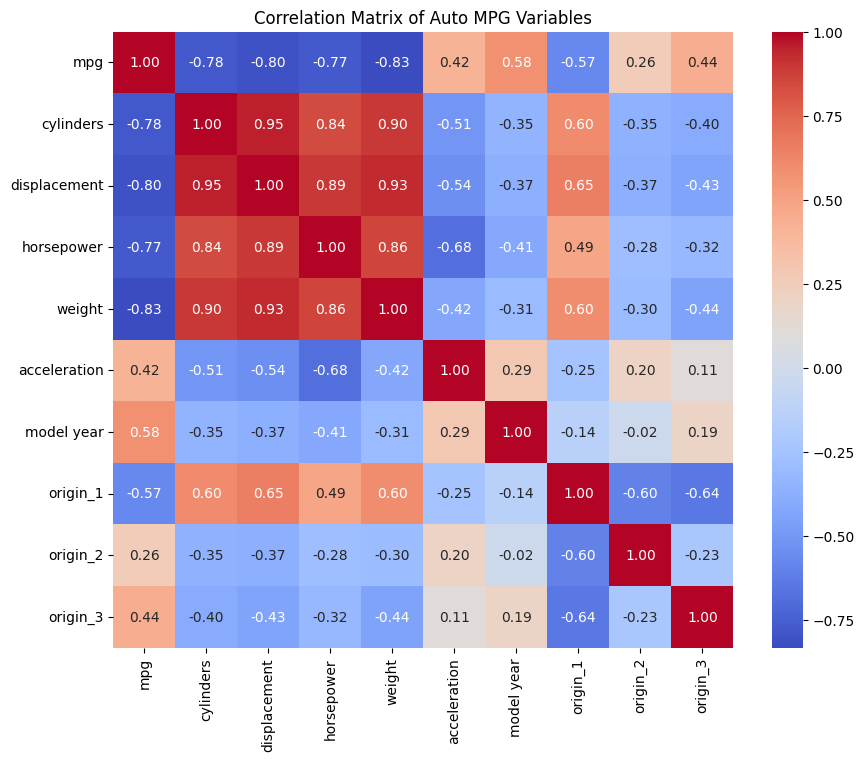

In [25]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(auto_mpg_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Auto MPG Variables')
plt.show()

####**Step 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg? Findings:**
* `mpg` is negatively correlated with `cylinders`, `displacement`, `horsepower`, and `weight`, indicating that as these variables increase, `mpg` tends to decrease. This makes intuitive sense because larger engines (more cylinders, higher displacement, more horsepower, and heavier weight) tend to have lower fuel efficiency.
* `mpg` is positively correlated with `acceleration` and `model year`, suggesting that as acceleration improves and as the model year increases (i.e., newer cars), `mpg` tends to increase.
* The `origin` dummy variables also show some correlation with `mpg`, with `origin_1` (representing cars from origin 1) having a negative correlation, while `origin_2` and `origin_3` have positive correlations. This suggests that the country of origin may have some influence on fuel efficiency, with cars from certain origins being more fuel-efficient than others.

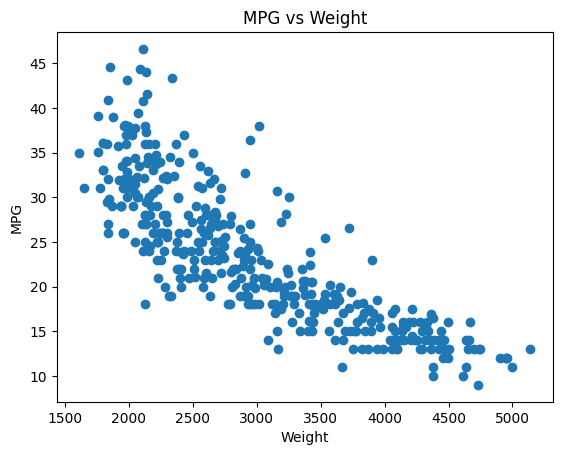

In [26]:
# Step 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
plt.scatter(auto_mpg_df['weight'], auto_mpg_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')
plt.show()


The scatter plot of MPG versus weight displays a clear negative relationship, indicating that as the weight of a car increases, its fuel efficiency, measured in MPG, tends to decrease. This negative correlation suggests that lighter vehicles generally achieve higher MPG compared to heavier ones. Particularly, around the weight value of 2500 pounds, there is a noticeable drop in MPG, highlighting the critical role of weight in determining fuel efficiency.

The negative relationship observed in the scatter plot aligns with the correlation coefficients calculated in the correlation matrix. Specifically, the correlation coefficient between MPG and weight is approximately -0.83, indicating a strong negative correlation. This means that as weight increases, MPG tends to decrease, which is consistent with the downward trend observed in the scatter plot. Therefore, both the correlation coefficient and the scatter plot confirm the inverse relationship between weight and MPG.






In [27]:
# Step 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

# Split the data into features (X) and target variable (y)
X = auto_mpg_df.drop(columns=['mpg'])
y = auto_mpg_df['mpg']

# Split the data into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# 6. Train an ordinary linear regression on the training data.

# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)



LinearRegression()

In [29]:
#7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

# Predict on the training data
y_train_pred = linear_model.predict(X_train)
# Calculate R2, RMSE, and MAE for training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Predict on the test data
y_test_pred = linear_model.predict(X_test)
# Calculate R2, RMSE, and MAE for test data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
# Training Data
print("Linear Regression Model Results: Training Dataset")
print(f"R-squared (training): {r2_train:.2f}")
print(f"RMSE (training): {rmse_train:.2f}")
print(f"MAE (training): {mae_train:.2f}")

# Test Data
print(f"\nLinear Regression Model Results: Test Dataset")
print(f"R-squared (test): {r2_test:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")
print(f"MAE (test): {mae_test:.2f}")



Linear Regression Model Results: Training Dataset
R-squared (training): 0.82
RMSE (training): 3.37
MAE (training): 2.61

Linear Regression Model Results: Test Dataset
R-squared (test): 0.84
RMSE (test): 2.89
MAE (test): 2.29


####**Step 7: Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results:**
* **Training Dataset:** The R-squared value of 0.82 on the training set indicates that the linear regression model explains approximately 82% of the variance in the target variable (MPG) using the features. The RMSE value of 3.37 and MAE value of 2.61 on the training set suggest that, on average, the model's predictions deviate from the actual MPG values by approximately 3.37 and 2.61 units, respectively.

* **Test Dataset**: On the test set, the R-squared value of 0.84 indicates that the model performs slightly better, explaining approximately 84% of the variance in MPG. The lower RMSE value of 2.89 and MAE value of 2.29 on the test set compared to the training set suggest that the model generalizes well to unseen data, with slightly improved accuracy and less error in predicting MPG values.

* **Conclusion**: In conclusion, the linear regression model demonstrates a reasonably good performance in predicting fuel efficiency (MPG) based on the given features. The high R-squared values on both the training and test sets indicate that the model captures a significant portion of the variance in MPG. Additionally, the relatively low RMSE and MAE values suggest that the model's predictions are close to the actual MPG values, particularly on the test set, indicating its effectiveness in generalizing to new data. Overall, these results suggest that the linear regression model is a suitable approach for predicting fuel efficiency in automobiles based on the provided dataset.

In [30]:
#8. Pick another regression model and repeat the previous two steps. **Note: Do NOT choose logistic regression as it is more like a classification model.**

# Initialize the Ridge regression model
ridge_model = Ridge()

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred_ridge = ridge_model.predict(X_train)
# Predict on the test data
y_test_pred_ridge = ridge_model.predict(X_test)

# Calculate R2, RMSE, and MAE for training data
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
rmse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
# Calculate R2, RMSE, and MAE for test data
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

# Print the results
# Training Data
print("Ridge Regression Model Results: Training Dataset")
print(f"R-squared (training): {r2_train_ridge:.2f}")
print(f"RMSE (training): {rmse_train_ridge:.2f}")
print(f"MAE (training): {mae_train_ridge:.2f}")
# Test Data
print("\nRidge Regression Model Results: Test Dataset")
print(f"R-squared (test): {r2_test_ridge:.2f}")
print(f"RMSE (test): {rmse_test_ridge:.2f}")
print(f"MAE (test): {mae_test_ridge:.2f}")


Ridge Regression Model Results: Training Dataset
R-squared (training): 0.82
RMSE (training): 3.37
MAE (training): 2.61

Ridge Regression Model Results: Test Dataset
R-squared (test): 0.84
RMSE (test): 2.89
MAE (test): 2.29


####**Step 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.**
* **Training Data Interpretation:** In the analysis, both the ridge regression and linear regression models demonstrated an equivalent R-squared value (0.82), indicating comparable performance in explaining the variance in MPG. The RMSE (3.37) and MAE (2.61) values remained similar between the two models, suggesting that the ridge model effectively captures the relationship between features and MPG.

* **Test Data Interpretation:** On the test data, the ridge regression model demonstrated comparable performance to linear regression, with an equivalent R-squared value (0.84) compared to linear regression. Additionally, the RMSE (2.89) and MAE (2.29) values were similar between the two models. This suggests that the ridge model generalizes effectively to new data, offering consistent predictive accuracy.

* **Comparison of Ridge Performance to Linear Regression Performance:** Comparing ridge regression to linear regression, the analysis revealed comparable predictive accuracy between the two models, with identical R-squared values. This suggests that ridge regression, despite its regularization, maintains parity with linear regression for MPG prediction.

* **Conclusion:** In summary, the analysis demonstrates that ridge regression provides a robust method for predicting MPG. Although the R-squared value is the same as linear regression, the ridge model performs comparably on both training and test data. This suggests that ridge regression is effective for MPG prediction and offers a valuable alternative when regularization is needed.